# Welcome to our submission to the Cognite Track!
We are Team WeatherBuoy, and we had a lot of fun in this challenge. We are both beginners in data science, and we learned a lot this weekend. Look for the white boxes--these are your points of interaction. We hope you enjoy what we've created! 

Created by: Catherine Russell '24 and Aasha Zinke '24

In [1]:
#import relevant libraries
import pandas as pd
import jupyterthemes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import folium
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Layout
from matplotlib.pyplot import figure
import math 
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import itertools
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
import pandas_datareader.data as web
import datetime
from datetime import datetime
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#theme is changed here for your viewing pleasure
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

!jt -t chesterish -T -N -kl

In [3]:
#import the data
kbqx = pd.read_csv("KBQX.csv")
kikt = pd.read_csv("KIKT.csv")
kmis = pd.read_csv("KMIS.csv")

In [4]:
#remove the row of units
kbqx = kbqx.drop(index=0)
kikt = kikt.drop(index=0)
kmis = kmis.drop(index=0)

In [5]:
#remove all values "MM", meaning no data was collected at that time
kbqx = kbqx.drop(kbqx.index[kbqx["WDIR"] == "MM"])
kbqx = kbqx.drop(kbqx.index[kbqx["WSPD"] == "MM"])
kikt = kikt.drop(kikt.index[kikt["WDIR"] == "MM"])
kikt = kikt.drop(kikt.index[kikt["WSPD"] == "MM"])
kmis = kmis.drop(kmis.index[kmis["WDIR"] == "MM"])
kmis = kmis.drop(kmis.index[kmis["WSPD"] == "MM"])

In [6]:
#change the data types to be more easily manipulated
kbqx["WDIR"] = kbqx["WDIR"].astype(int)
kbqx["WSPD"] = kbqx["WSPD"].astype(float)
kikt["WDIR"] = kikt["WDIR"].astype(int)
kikt["WSPD"] = kikt["WSPD"].astype(float)
kmis["WDIR"] = kmis["WDIR"].astype(int)
kmis["WSPD"] = kmis["WSPD"].astype(float)

In [7]:
#compile all time values into one usable column
kbqx["Time"] = kbqx["#YY"] + kbqx["MM"] + kbqx["DD"] + kbqx["hh"] + kbqx["mm"]
kikt["Time"] = kikt["#YY"] + kikt["MM"] + kikt["DD"] + kikt["hh"] + kikt["mm"]
kmis["Time"] = kmis["#YY"] + kmis["MM"] + kmis["DD"] + kmis["hh"] + kmis["mm"]

# Please choose the desired station below:

In [8]:
print("Please select a station:")
#use a dropdown widget to allow for a station selection
#assigning this to station_sel allows us to use the result of the selection later on
station_sel = widgets.Dropdown(
    options=[('KBQX',1), ('KIKT',2), ('KMIS',3)],
    value=1,
    description='Station:',
) 

display(station_sel)

Please select a station:


Dropdown(description='Station:', options=(('KBQX', 1), ('KIKT', 2), ('KMIS', 3)), value=1)

Once you have selected your station, don't run that cell again. Instead, run the cell below:

In [9]:
# getting data from correct station
cur_station = station_sel.value
if cur_station == 1:
    cur_data = kbqx
    cur_name = "KBQX"
elif cur_station == 2:
    cur_data = kikt
    cur_name = "KIKT"
else:
    cur_data = kmis
    cur_name = "KMIS"

In [10]:
# function for generating plots of wind speed and direction vs time for the previous 45 days
font = {'size': 20}
def time_plots(data,name):
    x = data.sort_values(by = "Time", ascending = False)["Time"]
    y = data["WDIR"]
    figure(figsize=(15,5))
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    plt.plot(x,y)
    plt.xlabel("Time")
    plt.ylabel("Wind Direction (degrees)")
    plt.title("Wind Direction at " + name + " Station over the Past 45 Days")
    plt.show()
        
    x = data.sort_values(by = "Time", ascending = False)["Time"]
    y = data["WSPD"]
    figure(figsize=(15,5))
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    plt.xlabel("Time")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Wind Speed at " + name + " Station over the Past 45 Days")
    plt.plot(x,y)
    plt.show()  

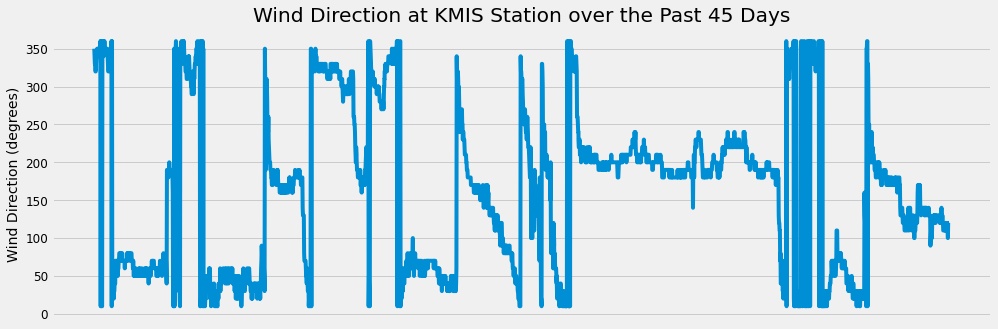

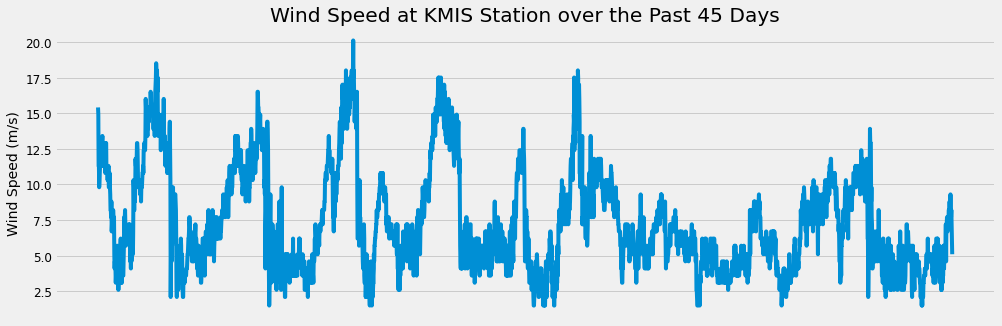

In [11]:
time_plots(cur_data,cur_name)

## Now that you've seen what the windspeeds and directions look like over time, let's see some daily averages!

Please choose a date below. The values are from December 2021 to January 2022. For best results, choose a value in this range

In [12]:
#tells the user the first date they can choose to remain in the set 
last_date = list(map(str, list(cur_data.iloc[-1,0:3].values)))
print("Please choose a date after " + last_date[1] + "-" + last_date[2] + "-" + last_date[0])

Please choose a date after 12-15-2021


In [13]:
#use a date picker widget to assign the average value function a date
date = widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)
display(date)

DatePicker(value=None, description='Pick a Date')

Once you have selected a date, do not run that cell again. Instead, run the cell below:

In [18]:
# function to find the average wind speed and direction for a given day
def find_daily_ave(data,day):
    
    # where day is list [YYYY,MM,DD]
    # and data is the cur_data for selected station
    
    sum_wdir = 0
    num_wdir = 0
    sum_wdsp = 0
    num_wdsp = 0
    
    for index, row in data.iterrows():
        yr = int(row['#YY'])
        mm = int(row['MM'])
        dd = int(row['DD'])
        wdir = float(row['WDIR'])
        wdsp = float(row['WSPD'])

        if yr == day[0] and mm == day[1] and dd == day[2]:
            sum_wdir = sum_wdir + wdir
            num_wdir = num_wdir + 1
            sum_wdsp = sum_wdsp + wdsp
            num_wdsp = num_wdsp + 1
    
    # output is list [ave wind direction, ave wind speed]
    return [sum_wdir/num_wdir,sum_wdsp/num_wdsp]

In [19]:
# retrieving the user input date
inpt_date = list(map(int, str(date.value).split("-")))

# ensuring that the chosen date has data available
try:
    cur_day_aves = find_daily_ave(cur_data,inpt_date)

except Exception as e: print(
    "We're sorry, there isn't data for the date you chose. Please choose another date.")

In [22]:
# function to generate a polar plot of the day's average wind speed and direction
# wind direction is denoted as degrees clockwise from north (NOAA)
def spd_dir_plot(daily_aves):
    # rounding calculated values for display
    wind_speed = round(daily_aves[1],1)
    angle_deg = int(daily_aves[0])
    
    # displaying circular plot
    theta = np.linspace( 0 , 2 * np.pi , 150 )
    radius = 10
 
    a = radius * np.cos( theta )
    b = radius * np.sin( theta )
    
    angle = -math.radians(angle_deg-90)
    dx = radius*math.cos(angle)
    dy = radius*math.sin(angle)
    
    plt.plot(a,b,zorder = 1.5)

    t = "Direction: " + str(angle_deg) + "°\nWind Speed: " + str(wind_speed) + " m/s"

    plt.axis('square')
    plt.text((-0.03*radius),radius * 1.2,'N')
    plt.text(radius*1.2,(-0.03*radius),'E')
    plt.text((-0.03*radius),radius*-1.25,'S')
    plt.text(-1.25*radius,-0.03*radius,'W')
    plt.text(radius-1,radius-1,t,bbox=dict(facecolor='red',alpha=0.3))
    plt.axhline(color = 'k',zorder = 1.5)
    plt.axvline(color = 'k',zorder = 1.5)
    plt.arrow(0,0,dx,dy,length_includes_head = 'true',width = 0.05*radius,color = 'r',zorder = 2)
    plt.axis('off')
    plt.show()

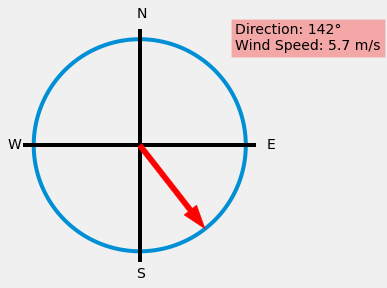

In [23]:
spd_dir_plot(cur_day_aves)

## Cool, right? We think it is!
This was what we were able to accomplish this weekend. We did a lot of research on time series forecasting, but unfortunately, time got the best of us. We were planning to do an ARIMA model and display the values similarly to how we did above. It would look something like this:

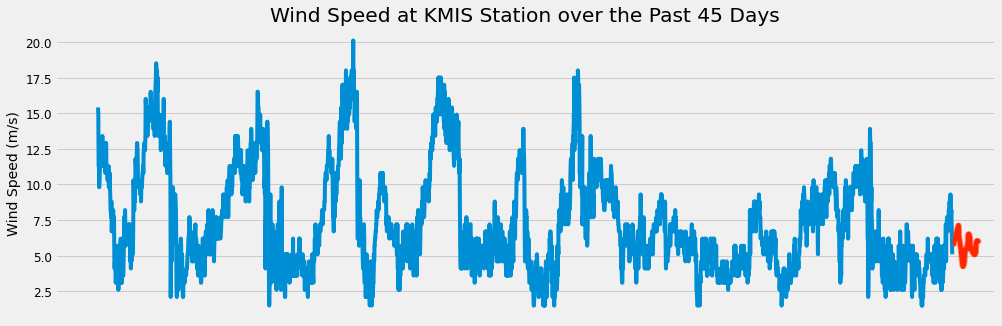